# IBM Stock price analysis

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
ibm = pd.read_csv('IBM.csv')

In [32]:
ibm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,7.713333,7.713333,7.626667,7.626667,0.624608,387200
1,1962-01-03,7.626667,7.693333,7.626667,7.693333,0.630068,288000
2,1962-01-04,7.693333,7.693333,7.613333,7.616667,0.623789,256000
3,1962-01-05,7.606667,7.606667,7.453333,7.466667,0.611504,363200
4,1962-01-08,7.460000,7.460000,7.266667,7.326667,0.600038,544000


In [33]:
ibm.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [34]:
ibm.shape

(14587, 7)

In [35]:
ibm.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

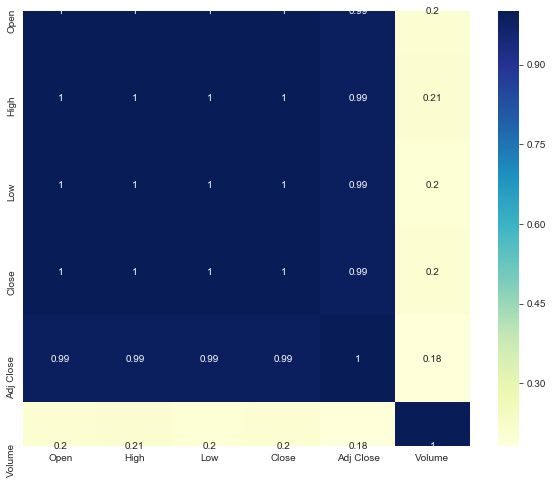

In [37]:
# checking correlations
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,8)) 
ax = sns.heatmap(ibm.corr(), annot=True, cmap="YlGnBu")

# Handling categorical data

In [38]:
# looking at Categorical data
ibm.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [39]:
# converting date column to numerical type
ibm['Date'] = pd.to_datetime(ibm['Date'])

In [40]:
ibm.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

# Looking at descriptive statistics and distributions

No handles with labels found to put in legend.


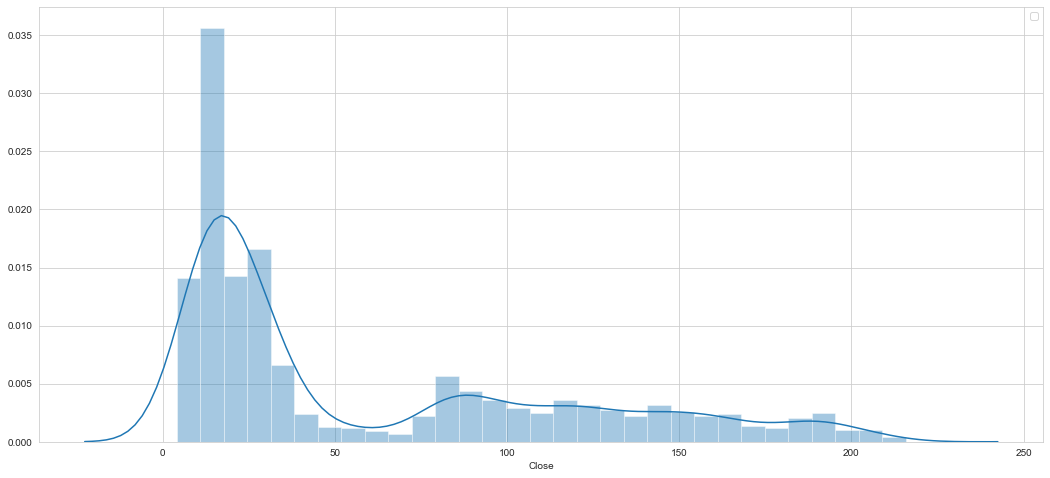

In [41]:
sns.distplot(ibm['Close'])
plt.legend()
plt.show()

In [42]:
ibm.describe()

,Open,High,Low,Close,Adj Close,Volume
count,14587.000000,14587.000000,14587.000000,14587.000000,14587.000000,1.458700e+04
mean,59.744843,60.294976,59.224455,59.763969,39.253701,4.857191e+06
std,57.226724,57.685702,56.801685,57.253157,50.286875,4.492271e+06
min,4.080000,4.286667,4.000000,4.080000,0.334242,0.000000e+00
25%,16.093750,16.200001,15.968750,16.090625,1.653353,1.307200e+06
50%,28.531250,28.750000,28.312500,28.531250,7.163728,4.094000e+06
75%,100.285000,101.974998,99.224998,100.404999,68.678944,6.846200e+06
max,215.380005,215.899994,214.300003,215.800003,167.242981,6.944470e+07


# Plotting stock price against time

In [15]:
#sns.lineplot(x="Date", y="Close", data=ibm)
#plt.xticks(rotation=15)
#plt.title('IBM Stock price over time')
#plt.show()

In [43]:
ibm = ibm.set_index('Date')
ibm.index

DatetimeIndex(['1962-01-02', '1962-01-03', '1962-01-04', '1962-01-05',
               '1962-01-08', '1962-01-09', '1962-01-10', '1962-01-11',
               '1962-01-12', '1962-01-15',
               ...
               '2019-11-27', '2019-11-29', '2019-12-02', '2019-12-03',
               '2019-12-04', '2019-12-05', '2019-12-06', '2019-12-09',
               '2019-12-10', '2019-12-11'],
              dtype='datetime64[ns]', name='Date', length=14587, freq=None)

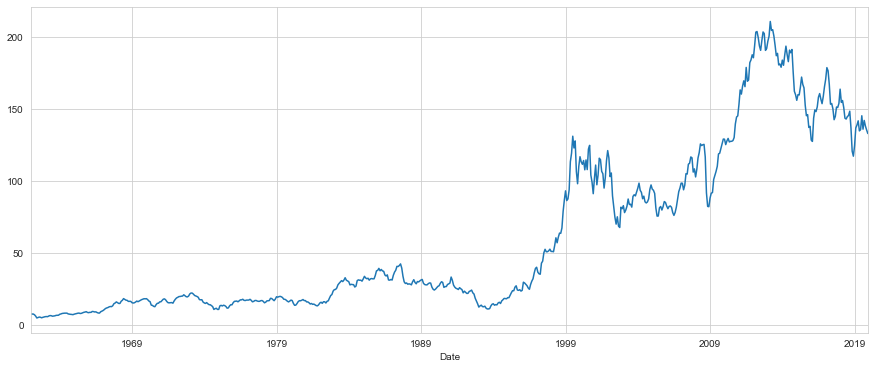

In [46]:
ibm['Close'].resample('MS').mean().plot(figsize=(15, 6))

 # Seasonal study 

In [47]:
y = ibm['Close'].resample('MS').mean()

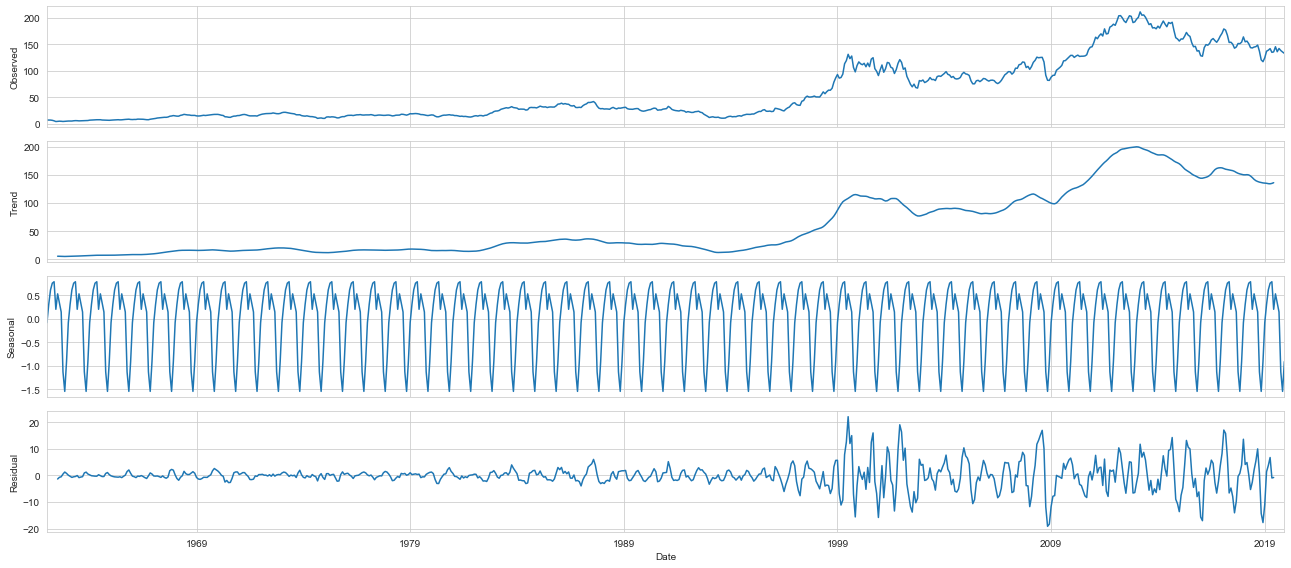

In [48]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive') # model can be multiplication
from scipy import signal
fig = decomposition.plot()
plt.show()

# Detrend

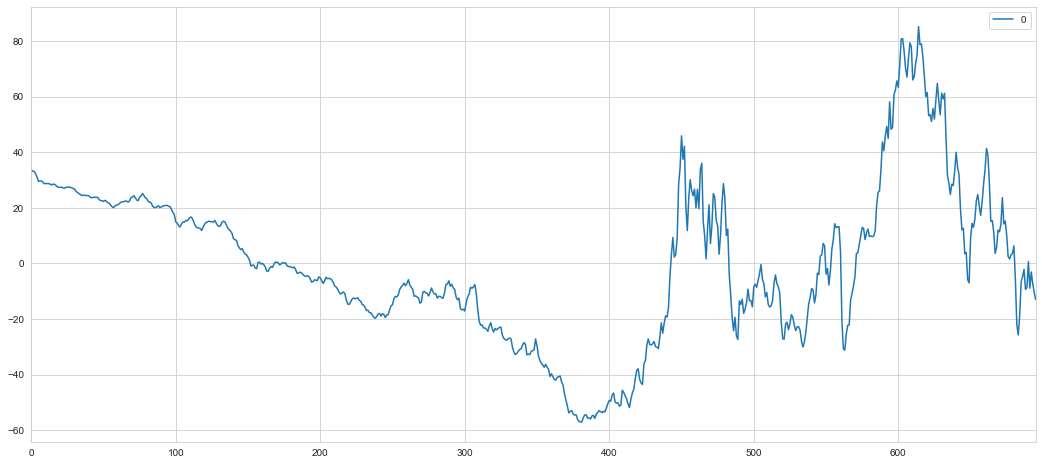

In [49]:
from scipy import signal

detrend = signal.detrend(y)
detrend2 = pd.DataFrame(detrend)
fig = detrend2.plot()
plt.show()

#  Autocorrelation 

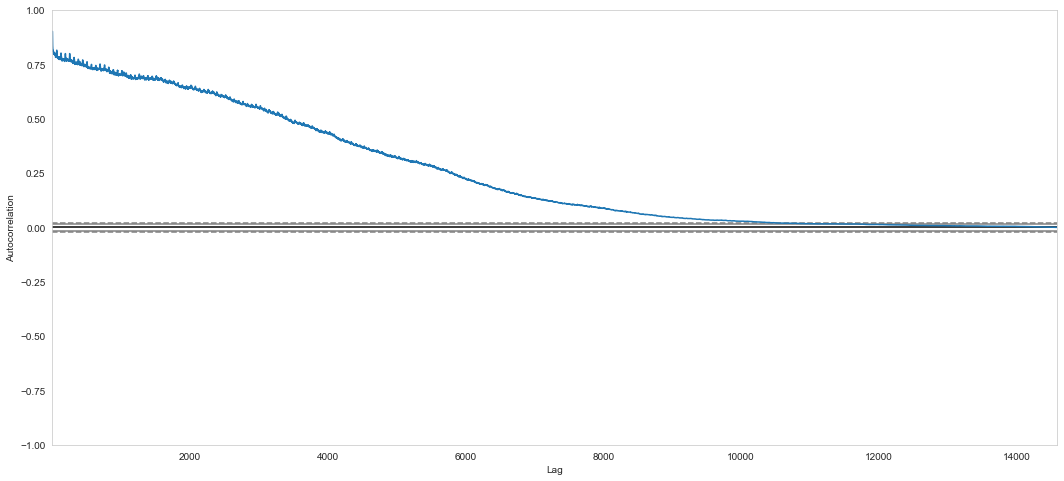

In [50]:
from pandas.plotting import autocorrelation_plot
 # probability of autocorrelation (hypothesis testing)
autocorrelation_plot(ibm)
plt.show()

In [51]:
from statsmodels.tsa.stattools import adfuller
adfuller(y, autolag = 'AIC')

(-0.7663529021845098,
 0.828806440391011,
 8,
 687,
 {'1%': -3.439904442607456,
  '5%': -2.8657562268758907,
  '10%': -2.569015252972123},
 3849.4973371272545)

# Arima

In [52]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ibm, order=(5,1,0))
model_fit = model.fit(disp=0)

print(model_fit.summary())

# plot residual errors: residual of an observed value is 
# the difference between the observed value and the estimated value of the quantity of interest 
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: endog must be 1-d or 2-d with 1 column

# Forecasting


In [28]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
X = ibm.values
size = int(len(X) * 0.75)   # Split percentage of dataset

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0)) # order is algorithm numbers (best 0-6)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

ValueError: endog must be 1-d or 2-d with 1 column

In [29]:
ibm.to_csv('IBM_clean.csv',index=True)